# Contenuti
- [k-Nearest Neighbour](#k-Nearest-Neighbour)
- [Dataset](#Dataset)
- [Esercizio 1](#Esercizio-1)
- [k-Nearest-Neighbour con Scikit-learn](#Alberi-decisionali-con-Scikit-learn)
- [Esercizio 2](#Esercizio-2)
- [Classificazione di documenti](#Classificazione-di-documenti)
- [Esercizio 3](#Esercizio-3)

# k-Nearest-Neighbour

Nell'esercitazione odierna si vedrà come applicare l'algoritmo di *k-NN* ad a un problema di classificazione multiclasse. Inizialmente usando la tecnica del Nearest-Neighbour o k-Nearest-Neighbour con k=1 per poi utilizzare differenti valori di k, fino alla ricerca del miglior valore di k.

# Dataset
La libreria **Scikit-learn** mette a disposizione anche numerosi dataset per eseguire esercitazioni/tutorial/esperimenti, alcuni dei quali "giocattolo" altri più simili ad applicazini reali. Il dataset che useremo per questa esercitazione è estratto dai dataset giocattolo (toy dataset) che potete trovare nella [documentazione](https://scikit-learn.org/stable/datasets.html) e si chiama Iris Plant dataset. E' uno dei dataset più conosciuti nella letteratura del Machine Learning, proposto in un articolo scientifico negli anni 50 che viene citato frequentemente ancora oggi. Il set di dati contiene 3 classi di 50 istanze ciascuna, dove ogni classe si riferisce a un tipo di pianta di iris. Ogni record è rappresentato da 4 attributi numerici che definiscono la lunghezza e larghezza di sepali e petali. Per caricare il dataset è necessario importare il modulo della libreria che lo contiene per poi richiamarla all'interno del codice.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Dato che il dataset non è partizionato lo suddivideremo in due parti, training e test set, per addestrare il classificatore atraverso il training set e simulare le prestazioni dei modelli su dati nuovi/non visti. Per ulteriori dettagli sulla procedura train_test_split si rimanda all'esercitazione 3.

In [2]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.25)
print('Shape training set:', train_x.shape)
print('Shape validation set:', test_x.shape)

Shape training set: (112, 4)
Shape validation set: (38, 4)


Per il calcolo delle misure di prossimità **Scikit-Learn** mette a disposizione numerose funzioni, la maggior parte delle quali presenti nel modulo **sklearn.metrics.pairwise**, dal quale per il momento importeremo la sola distanza Euclidea.

In [3]:
from sklearn.metrics.pairwise import euclidean_distances

Durante le lezioni teoriche abbiamo visto come funziona la classificazione con *k-NN*. Questo classificatore può essere facilmente implementato anche algoritmicamente. Dati gli esempi di addestramento {xi, yi}, dove xi rappresenta i valori degli attributi, yi rappresenta le etichette delle classi, e c'è un nuovo punto di prova X che deve essere classificato. L'algoritmo di classificazione *k-NN* esegue i seguenti passi:
1. calcola la distanza tra x e xi per ogni valore dato di xi.
2. scegli i k vicini più prossimi x1, ... xk e le rispettive etichette di classe y1, ... yk.
3. restituisce una y che è la più frequente nell'elenco delle etichette y1, ... yk.

Nel caso più semplice, ossia quando k=1 i passi 2 e 3 diventano ancora più semplice, dato che è sufficiente selezionare l'etichetta y dell'istanza più vicina. Un esempio è mostrato di seguito.

In [6]:
import numpy as np
#seleziono dal test set un singolo record/istanza
X = test_x[0,:]
#la funzione euclidean_distances si aspetta di trovare array di rank 2
#(per dettagli sul significato di rank si rimanda all'esercitazione 1)
#perciò dato che in questo caso abbiamo selezionato un solo record (array riga)
#dobbiamo espandere le dimensioni per trasformarlo in una matrice con una sola riga 
print("X shape prima dell'espansione: ", np.shape(X))
X = np.expand_dims(X, axis=0)
print("X shape dopo l'espansione: ", np.shape(X))
#calcolo la distanza euclidea tra il nuovo record e tutto il training set 
distances = euclidean_distances(train_x, X)
#seleziono l'indice dell'elemento con la distanza minima k=1
i = np.argmin(distances)
#seleziono e stampo la label da assegnare al nuovo record
print("Il nuovo record con attributi ", X, " appartiene alla classe ", train_y[i])
print("Il record del training set più simile ha come attributi ", train_x[i,:])

X shape prima dell'espansione:  (4,)
X shape dopo l'espansione:  (1, 4)
Il nuovo record con attributi  [[5.8 2.8 5.1 2.4]]  appartiene alla classe  2
Il record del training set più simile ha come attributi  [5.8 2.7 5.1 1.9]


## Esercizio 1

Utilizzando il codice prodotto in precedenza e prendendo spunto da quello svolto nelle esercitazioni precedenti (classificatore binario 1-d e classificatore binario 2-d) creare un classificatore multi-classe basato su Nearest Neighbour.

Infine calcolare le prestazioni di questo classificatore.

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def analysis(cm):
    TP, FN, FP , TN = (cm[0,0],cm[0,1],cm[1,0],cm[1,1])
    tpr = TP/(TP+FN)
    tnr = TN/(TN+FP)
    fpr = FP/(TN+FP)
    fnr = FN/(TP+FN)
    p = TP/(FP+TP)
    f = (2 * tpr * p) / (p + tpr)
    return[tpr,tnr,fpr,fnr,p,f]


#Scrivi qui la soluzione
class SimpleNNClassifier:
    def fit(self,X,y):
        self.train_x = X
        self.train_y = y

        
    def predict(self,X):
        distances = [euclidean_distances(self.train_x, [rec]) for rec in X]
        mindist = [np.argmin(dist) for dist in distances]
        return np.array([self.train_y[i] for i in mindist] )

bc = SimpleNNClassifier()
bc.fit(train_x,train_y)
pred_y = bc.predict(test_x)
print(pred_y[0:25])
print(test_y[0:25])
cm1 = confusion_matrix(pred_y,test_y)

print(analysis(cm1))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2]
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0]


# k-Nearest-Neighbour con Scikit-learn
Di seguito vengono descritte le operazioni necessarie per creare e addestrare un classificatore *k-NN* facendo uso della libreria **Scikit-learn**. Anche questo classificatore può essere addestrato tramite il metodo **.fit(...)** che prende in input un insieme di record etichettati X,y, e predirre la classe di uno o più pattern in input tramite il metodo **.predict(...)**.

Come per gli altri classificatori in Scikit-learn dobbiamo creare un'istanza della classe e poi procedere all'addestramento. 
Il classificatore in questo caso è un [**KNeighborsClassifier(...)**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Nel codice qui sotto, è impostato l'iperparametro n_neighbors = 1 per creare un classificatore uguale a quello che abbiamo creato nell'esercizio precedente e quindi poterlo confrontare. Di default questo classificatore utilizza già la distanza Euclidea.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

#istanza di un k-NN con k = 1
kNN_clf = KNeighborsClassifier(1,algorithm='brute')

Ora possiamo procedere con l'addestramento del modello tramite il metodo **.fit(...)** che prende in input un insieme di record etichettati X,y.

In [23]:
# Addestramento
kNN_clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

Possiamo verificare i parametri del nostro classificatore tramite il metodo **get_params()**. 

In [24]:
kNN_clf.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

Anche in questo caso per riconoscere la classe di uno o più pattern utilizziamo il metodo **.predict(...)** e il metodo **.predict_proba(...)**, per verificare con quale valore di probabilità i pattern sono classificati.

In [25]:
# Uso della funzione .predict(...)
pred_y2 = kNN_clf.predict(test_x)

# Uso della funzione .predict_proba(...)
pred_prob_y = kNN_clf.predict_proba(test_x)

# Per verificare il valore delle predizioni ne mostriamo un sotto-insieme
print('Classi reali:', test_y[0:10])
print('Classi predette:', pred_y2[0:10])
print('Probabilità predette:', pred_prob_y[0:10,:])

Classi reali: [2 1 0 2 0 2 0 1 1 1]
Classi predette: [2 1 0 2 0 2 0 1 1 1]
Probabilità predette: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


Come potete notare, come per il classificatore dummy, i valori di probabilità restituiti coincidono con i valori delle label predette, ma a differenze del classificatore dummy questi valori possono variare a seconda dei parametri utilizzati per instanziare il classificatore.

## Esercizio 2

Calcolare e confrontare le prestazioni di questo k-NN con le prestazioni del classificatore NN  prodotto nell'esercizio 1.

Verificare come cambiano le prestazione del kNN al variare del valore di k e della metrica utilizzata.

Mio classificatore:
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0]
Classificatore di scikit:
[1.0, 1.0, 0.0, 0.0, 1.0, 1.0]


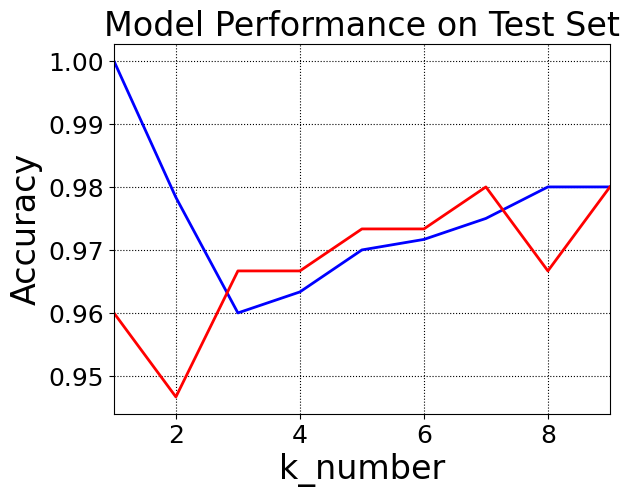

In [29]:
import sklearn
import matplotlib.pyplot as plt

#Scrivi qui la soluzione
def crossvalidation_plot_knn(X,y,kmax=10):
    max_k_range = list(range(1, kmax))
    acc_test = []
    acc_train = []
    for ki in max_k_range:
        clf = KNeighborsClassifier(ki,algorithm='brute')
        score = sklearn.model_selection.cross_validate(clf,X,y,return_train_score=True)
        acc_test = acc_test + [np.mean(score["test_score"])]
        acc_train = acc_train +[np.mean(score["train_score"])]
    plt.plot(max_k_range, acc_train, lw=2, color='b')
    plt.plot(max_k_range, acc_test, lw=2, color='r')
    plt.xlim([1, max(max_k_range)])
    plt.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')
    plt.tick_params(labelsize = 18)
    plt.xlabel('k_number', fontsize = 24)
    plt.ylabel('Accuracy', fontsize = 24)
    plt.title('Model Performance on Test Set', fontsize = 24)
    plt.show()

cm2 = confusion_matrix(test_y,pred_y2)
print("Mio classificatore:")
print(analysis(cm1))
print("Classificatore di scikit:")
print(analysis(cm2))

crossvalidation_plot_knn(iris.data,iris.target,10)



# Classificazione di documenti
In questa ultima parte dell'esercitazione odierna ci focalizzeremo sul task di classificazione di documenti testuali. A questo scopo utilizzeremo un ulteriore dataset messo a disposizione dalla libreria **Scikit-learn** che potete trovare nella [documentazione](https://scikit-learn.org/stable/datasets.html) e si chiama 'The 20 newsgroups text dataset'. Il set di dati contiene 20 classi e 11314 record che rappresenta un documento. Ogni record è rappresentato da 130107 attributi numerici che definiscono la frequenza delle parole all'interno del testo. Per caricare il dataset è necessario importare il modulo della libreria che lo contiene per poi richiamarla all'interno del codice. 

In [27]:
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
#per importare il dataset in formato (data_matrix, label) è necessario specificare return_X_y=True
X, y = fetch_20newsgroups_vectorized(return_X_y=True)

print(np.shape(X))
print(np.shape(y))

(11314, 130107)
(11314,)


## Esercizio 3

Dato che si tratta di un dataset (e soprattutto un task) diverso dal precedente i valori di k e della metrica stimati nel caso precedente non saranno più idonei. Eseguire il tuning degli iperparametri utilizzando una cross-validation.

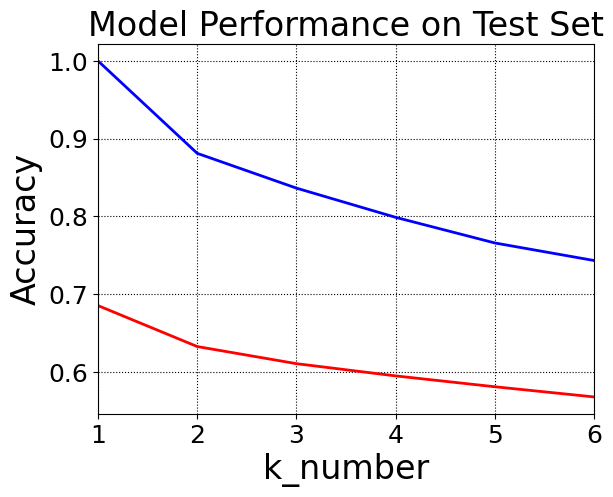

In [54]:
#Scrivi qui la soluzione
crossvalidation_plot_knn(X,y,7)

In [48]:
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.25)
print('Shape training set:', train_x.shape)
print('Shape validation set:', test_x.shape)
k = 20;
knn_clf_news = KNeighborsClassifier(k,algorithm="brute")
knn_clf_news.fit(train_x,train_y)


Shape training set: (8485, 130107)
Shape validation set: (2829, 130107)


KNeighborsClassifier(algorithm='brute', n_neighbors=20)

In [50]:
pred= knn_clf_news.predict(test_x)
print('Classi reali:\n', test_y[0:30])
print('Classi predette:\n', pred[0:30])

cm = confusion_matrix(test_y,pred)
print(analysis(cm))

Classi reali:
 [14  5 15  8  4 14  8 14 13 13 14 19  6 12 12  9 16  1  9 10 15  3  0  2
  5 10 17 10 12  5]
Classi predette:
 [14  5 19 11 17 18  8  0  0 17 11 19  6 18  0  9 16 11 17 10 15  4  0  2
  5 10 17 15 15 15]
[1.0, 0.8913043478260869, 0.10869565217391304, 0.0, 0.9285714285714286, 0.962962962962963]


In [53]:
k = 10
acc_test =[]
acc_train =[]
clf = KNeighborsClassifier(k,algorithm='brute')
score = sklearn.model_selection.cross_validate(clf,X,y,return_train_score=True)
print(score["test_score"])
print(score["train_score"])
# acc_test = acc_test + [np.mean(score["test_score"])]
# acc_train = acc_train +[np.mean(score["train_score"])]

[0.53071144 0.53468847 0.53689792 0.51657092 0.53050398]
[0.67064413 0.67053364 0.66224727 0.66379406 0.67045957]
